In [2]:
from TransformingCity import TransformingCity, LandUseViewer, PopulationViewer, RentViewer

import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import scipy

%matplotlib inline
from matplotlib import rc
rc('animation', html='html5')

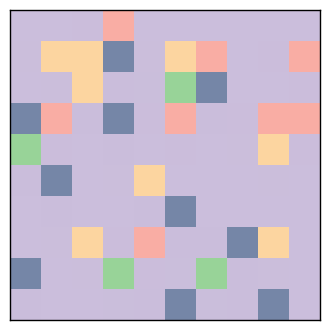

In [3]:
city = TransformingCity(10)
city.array = city.landuse # default array is landuse
viewer = LandUseViewer(city)
anim = viewer.animate()

In [4]:
# anim

In [5]:
print(city.array)

[[1 1 1 3 1 1 1 1 1 1]
 [1 2 2 5 1 2 3 1 1 3]
 [1 1 2 1 1 6 5 1 1 1]
 [5 3 1 5 1 3 1 1 3 3]
 [6 1 1 1 1 1 1 1 2 1]
 [1 5 1 1 2 1 1 1 1 1]
 [1 1 1 1 1 5 1 1 1 1]
 [1 1 2 1 3 1 1 5 2 1]
 [5 1 1 6 1 1 6 1 1 1]
 [1 1 1 1 1 5 1 1 5 1]]


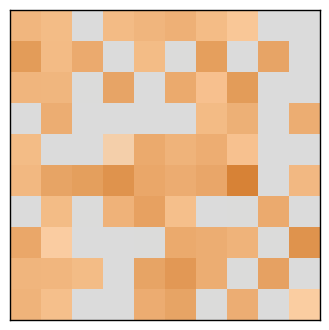

In [6]:
city = TransformingCity(10)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate()

In [7]:
print(city.array)

[[ 14.  12.   0.  12.  14.  16.  12.   8.   0.   0.]
 [ 23.  12.  18.   0.  12.   0.  22.   0.  20.   0.]
 [ 14.  14.   0.  20.   0.  18.  10.  23.   0.   0.]
 [  0.  17.   0.   0.   0.   0.  12.  16.   0.  17.]
 [ 12.   0.   0.   5.  18.  15.  17.  10.   0.   0.]
 [ 13.  20.  22.  26.  19.  17.  19.  32.   0.  13.]
 [  0.  12.   0.  15.  21.  11.   0.   0.  18.   0.]
 [ 19.   6.   0.   0.   0.  18.  17.  15.   0.  26.]
 [ 14.  14.  12.   0.  20.  24.  17.   0.  21.   0.]
 [ 15.  11.   0.   0.  17.  20.   0.  17.   0.   6.]]


In [8]:
 anim

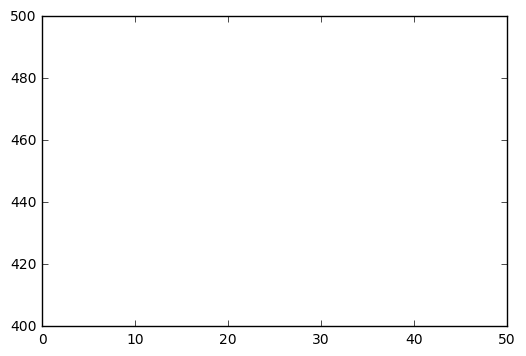

In [9]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
for i in range(50):
    city.step()
    
plt.plot(city.displaced_history)
plt.ylim([400, 500])
plt.show()

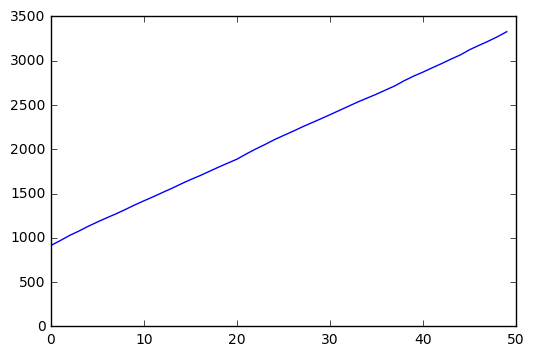

In [10]:
#A smaller city with new agents moving in means that...
#more agents get displaced, because creative density gets EVEN higher.
city = TransformingCity(7)
steps = 50
n_to_add_per_step = 50
for i in range(steps):
    city.step()
    city.add_agents(n_to_add_per_step)
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000 + steps*n_to_add_per_step])
plt.show()

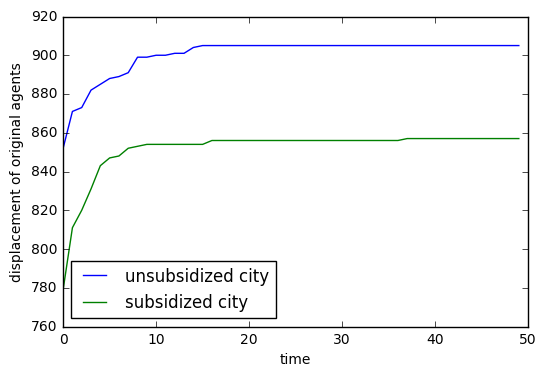

In [11]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
sub_city = TransformingCity(7, p_subsidized = .1)


for i in range(50):
    city.step()
    sub_city.step()
    
plt.plot(city.displaced_history, label='unsubsidized city')
plt.plot(sub_city.displaced_history, label='subsidized city')
plt.legend(loc='best')
plt.ylabel('displacement of original agents')
plt.xlabel('time')
#plt.ylim([0, 1000])
plt.show()

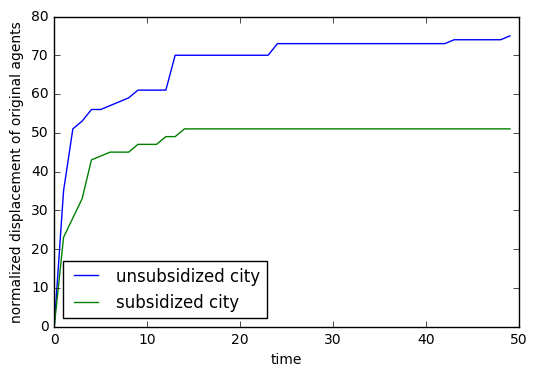

In [12]:
city = TransformingCity(7)
sub_city = TransformingCity(7, p_subsidized = .1)


for i in range(50):
    city.step()
    sub_city.step()
    
unsubnormalized = [x - city.displaced_history[0] for x in city.displaced_history]
subnormalized = [x - sub_city.displaced_history[0] for x in sub_city.displaced_history]
plt.plot(unsubnormalized, label='unsubsidized city')
plt.plot(subnormalized, label='subsidized city')
plt.legend(loc='best')
plt.ylabel('normalized displacement of original agents')
plt.xlabel('time')
# plt.ylim([0, 1000])
plt.show()

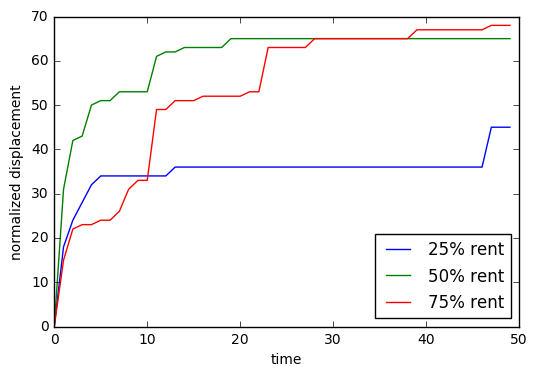

In [13]:
np.random.seed(40)
city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25)
city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5)
city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75)

for i in range(50):
    city_quarter.step()
    city_half.step()
    city_threequarter.step()
    
quarter = [x - city_quarter.displaced_history[0] for x in city_quarter.displaced_history]
half = [x - city_half.displaced_history[0] for x in city_half.displaced_history]
threequarter = [x - city_threequarter.displaced_history[0] for x in city_threequarter.displaced_history]

plt.plot(quarter, label='25% rent')
plt.plot(half, label='50% rent')
plt.plot(threequarter, label='75% rent')
plt.legend(loc='best')
plt.ylabel('normalized displacement')
plt.xlabel('time')
plt.show()

In [14]:

def get_slopes(cities):


    for i in range(20):
        for city in cities:
            city.step()

    i = 0
    slopes = []
    for city in cities:
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(range(len(city.displaced_history)), city.displaced_history)
        slopes.append(slope)
        #print(slopes[i-1])
        i += 1
        
    return tuple(slopes)
    

In [15]:
#linear regression of a bunch of runs.
slopes1 = []
slopes2 = []
for i in range(100):
    city1 = TransformingCity(7)
    sub_city = TransformingCity(7, p_subsidized = .1)
    cities = [city1, sub_city]
    slope1, slope2 = get_slopes(cities)
    slopes1.append(slope1)
    slopes2.append(slope2)

In [26]:
print(np.mean(slopes1))
print(np.mean(slopes2))

1.32471428571
1.49963157895


In [27]:
slopes25 = []
slopes50 = []
slopes75 = []

for i in range(100):
    city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25)
    city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5)
    city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75)
    
    cities = [city_quarter, city_half, city_threequarter]
    s25, s50, s75 = get_slopes(cities)
    slopes25.append(s25)
    slopes50.append(s50)
    slopes75.append(s75)
    

print('25%: {slope}'.format(slope=np.mean(slopes25)))
print('50%: {slope}'.format(slope=np.mean(slopes50)))
print('75%: {slope}'.format(slope=np.mean(slopes75)))


25%: 1.567548872180451
50%: 2.131654135338346
75%: 1.7025789473684214


In [1]:
%%timeit

end_25 = []
end_50 = []
end_75 = []

for i in range(1000):
    city_quarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.25)
    city_half = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.5)
    city_threequarter = TransformingCity(7, p_subsidized = .5, sub_housing_rate = 0.75)
    
    for j in range(20):
        city_quarter.step()
        city_half.step()
        city_threequarter.step()
        
    end_25.append(city_quarter.displaced_history[-1])
    end_50.append(city_half.displaced_history[-1])
    end_75.append(city_threequarter.displaced_history[-1])

NameError: name 'TransformingCity' is not defined

Number of displaced original residents after 20 time steps for 25%: 523.46
Number of displaced original residents after 20 time steps for 50%: 848.54
Number of displaced original residents after 20 time steps for 75%: 904.47


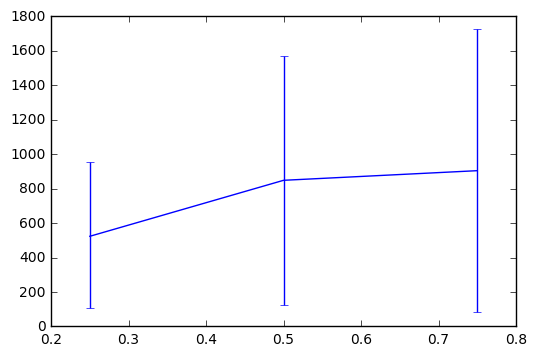

In [31]:
print('Number of displaced original residents after 20 time steps for 25%: {p20}'.format(p20=np.mean(end_25)))
print('Number of displaced original residents after 20 time steps for 50%: {p20}'.format(p20=np.mean(end_50)))
print('Number of displaced original residents after 20 time steps for 75%: {p20}'.format(p20=np.mean(end_75)))

sub_rates = [0.25, 0.5, 0.75]
means = [np.mean(end_25), np.mean(end_50), np.mean(end_75)]
yerrs = [[np.percentile(end_25, .15), np.percentile(end_50, .15), np.percentile(end_75, .15)],
        [np.percentile(end_25, .85), np.percentile(end_50, .85), np.percentile(end_75, .85)]]
plt.errorbar(sub_rates, means, yerrs)
plt.show()

change in % of creative space in unsubsidized city: -14.9 %
change in % of creative space in 50% subsidized city: -21.3 %


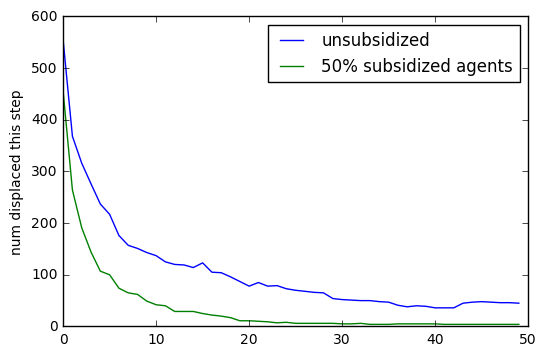

In [19]:
city = TransformingCity(10, avg_rent=10000)
sub_city = TransformingCity(10, avg_rent=10000, p_subsidized=0.5)

for i in range(50):
    city.step()
    sub_city.step()

print("change in % of creative space in unsubsidized city: {0:.1f} %".format(
        (city.p_creative_space_history[-1] - city.p_creative_space_history[0])*100))
print("change in % of creative space in 50% subsidized city: {0:.1f} %".format(
        (sub_city.p_creative_space_history[-1] - sub_city.p_creative_space_history[0])*100))
plt.hold('on')
plt.plot(city.num_displaced_this_step_history, label='unsubsidized')
plt.plot(sub_city.num_displaced_this_step_history, label='50% subsidized agents')
plt.ylabel('num displaced this step')
plt.legend(loc='best')
plt.show()

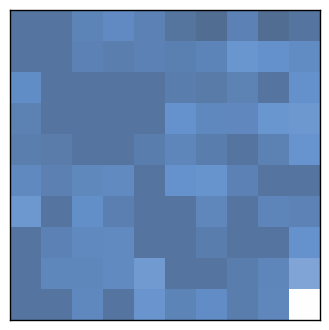

In [16]:
city = TransformingCity(10)
city.step()
city.array = city.rent_diff
viewer = RentViewer(city)
anim = viewer.animate()

In [17]:
print(city.array)

[[    0.             0.         -1986.6373908  -2943.7460294  -1873.72123419
      0.          1281.05922515 -1888.99142212  1168.11666896     0.        ]
 [    0.             0.         -1769.43830661 -1231.14062728
  -1702.53457525 -1541.04413932 -2171.98984312 -4530.09724268
  -3880.54346873 -3115.03035552]
 [-3374.80337514     0.             0.             0.             0.
  -1152.43102598  -738.66722717 -1845.34938454     0.         -3931.939023  ]
 [-1660.02382746     0.             0.             0.             0.
  -4038.12440935 -2699.87489686 -2602.49821515 -4521.07143137
  -4754.69500669]
 [-1223.29025382 -1020.81807429     0.             0.         -1162.22781032
  -2231.36146858 -1033.85013701     0.         -1726.16291153
  -4161.77983873]
 [-2864.51920172 -1483.69647131 -2604.8741401  -2918.09283647     0.
  -4078.71772105 -4320.81996608 -1791.98756007     0.             0.        ]
 [-4766.37395891     0.         -3582.34255538 -1339.18168219     0.             0.
  -2

In [18]:
anim